### Step 0: Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.dates as mdates
from random import randint
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('../data/csv/US Raw Events.csv')

### Step 1: Data Understanding

#### Shape of Data and Descriptive Stats

In [3]:
df.shape

(96655, 77)

In [4]:
df.head(5)

,EVENT_ID,EVENT_NAME,EVENT_NOTES,EVENT_INFO,EVENT_STATUS,EVENT_START_DATETIME,EVENT_END_DATETIME,EVENT_START_LOCAL_DATE,EVENT_START_LOCAL_TIME,ONSALE_START_DATETIME,ONSALE_END_DATETIME,CLASSIFICATION_SEGMENT,CLASSIFICATION_GENRE,CLASSIFICATION_SUB_GENRE,EVENT_IMAGE_URL,MIN_PRICE,MAX_PRICE,CURRENCY,ATTRACTION_NAME,ATTRACTION_ID,ATTRACTION_IMAGE_URL,VENUE_NAME,VENUE_ID,VENUE_STREET,VENUE_CITY,VENUE_STATE_CODE,VENUE_COUNTRY_CODE,VENUE_LATITUDE,VENUE_LONGITUDE,VENUE_ZIP_CODE,VENUE_TIMEZONE,ATTRACTION_URL,VENUE_URL,PRIMARY_EVENT_URL,RESALE_EVENT_URL,PRESALE_NAME,PRESALE_DATETIME_RANGE,LEGACY_EVENT_ID,LEGACY_VENUE_ID,LEGACY_ATTRACTION_ID,PRESALE_NAME.1,PRESALE_DESCRIPTION,PRESALE_START_DATETIME,PRESALE_END_DATETIME,SOURCE,CLASSIFICATION_TYPE,CLASSIFICATION_SUB_TYPE,PROMOTER_ID,PROMOTER_NAME,CLASSIFICATION_SEGMENT_ID,CLASSIFICATION_GENRE_ID,CLASSIFICATION_SUB_GENRE_ID,CLASSIFICATION_TYPE_ID,CLASSIFICATION_SUB_TYPE_ID,ATTRACTION_CLASSIFICATION_SEGMENT_ID,ATTRACTION_CLASSIFICATION_SEGMENT,ATTRACTION_CLASSIFICATION_GENRE_ID,ATTRACTION_CLASSIFICATION_GENRE,ATTRACTION_CLASSIFICATION_SUB_GENRE_ID,ATTRACTION_CLASSIFICATION_SUB_GENRE,ATTRACTION_CLASSIFICATION_TYPE_ID,ATTRACTION_CLASSIFICATION_TYPE,ATTRACTION_CLASSIFICATION_SUB_TYPE_ID,ATTRACTION_CLASSIFICATION_SUB_TYPE,MIN_PRICE_WITH_FEES,MAX_PRICE_WITH_FEES,TRANSACTABLE,HOT_EVENT,ACCESSIBLE_SEATING_DETAIL,ADA_PHONE,ADA_CUSTOM_COPY,ADA_HOURS,ACCESSIBILITY_INFO,API_ONSALE_START_DATETIME,PLEASE_NOTE,IMPORTANT_INFORMATION,EVENT_END_LOCAL_DATE
0,rZ7HnEZ1AfF6aK,Tonight at the Improv!,NaN,DO NOT PURCHASE TICKETS FROM ANYONE OR ANY OTH...,onsale,2025-03-02T05:30:00Z,NaN,2025-03-01,21:30,2025-01-20T21:00:00Z,2025-03-02T06:00:00Z,Undefined,NaN,NaN,https://i.ticketweb.com/i/00/12/86/60/03_Edp.j...,29.34,29.34,USD,NaN,NaN,NaN,Hollywood Improv (The Main Room),rZ7HnEZ178sj4,8162 Melrose Avenue,Hollywood,CA,US,34.083418,-118.366556,90046,America/Los_Angeles,NaN,https://www.ticketweb.com/venue/hollywood-impr...,https://www.ticketweb.com/event/tonight-at-the...,NaN,NaN,NaN,rZ7HnEZ1AfF6aK,NaN,NaN,NaN,NaN,NaN,NaN,ticketweb,Undefined,Undefined,NaN,NaN,KZFzniwnSyZfZ7v7nl,NaN,NaN,KZAyXgnZfZ7v7nI,KZFzBErXgnZfZ7v7lJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,2025-01-20T22:00:00Z,This event is 21 and over. Any ticket holder u...,NaN,NaN
1,rZ7HnEZ1AfF6aN,Tonight at the Improv!,NaN,DO NOT PURCHASE TICKETS FROM ANYONE OR ANY OTH...,onsale,2025-03-09T05:30:00Z,NaN,2025-03-08,21:30,2025-01-20T21:00:00Z,2025-03-09T06:00:00Z,Undefined,NaN,NaN,https://i.ticketweb.com/i/00/12/86/60/03_Edp.j...,29.34,29.34,USD,NaN,NaN,NaN,Hollywood Improv (The Main Room),rZ7HnEZ178sj4,8162 Melrose Avenue,Hollywood,CA,US,34.083418,-118.366556,90046,America/Los_Angeles,NaN,https://www.ticketweb.com/venue/hollywood-impr...,https://www.ticketweb.com/event/tonight-at-the...,NaN,NaN,NaN,rZ7HnEZ1AfF6aN,NaN,NaN,NaN,NaN,NaN,NaN,ticketweb,Undefined,Undefined,NaN,NaN,KZFzniwnSyZfZ7v7nl,NaN,NaN,KZAyXgnZfZ7v7nI,KZFzBErXgnZfZ7v7lJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,2025-01-20T22:00:00Z,This event is 21 and over. Any ticket holder u...,NaN,NaN
2,rZ7HnEZ1AfF6aS,Tonight at the Improv!,NaN,DO NOT PURCHASE TICKETS FROM ANYONE OR ANY OTH...,onsale,2025-03-30T02:00:00Z,NaN,2025-03-29,19:00,2025-01-20T21:00:00Z,2025-03-30T02:30:00Z,Undefined,NaN,NaN,https://i.ticketweb.com/i/00/12/86/60/03_Edp.j...,29.34,29.34,USD,NaN,NaN,NaN,Hollywood Improv (The Main Room),rZ7HnEZ178sj4,8162 Melrose Avenue,Hollywood,CA,US,34.083418,-118.366556,90046,America/Los_Angeles,NaN,https://www.ticketweb.com/venue/hollywood-impr...,https://www.ticketweb.com/event/tonight-at-the...,NaN,NaN,NaN,rZ7HnEZ1AfF6aS,NaN,NaN,NaN,NaN,NaN,NaN,ticketweb,Undefined,Undefined,NaN,NaN,KZFzniwnSyZfZ7v7nl,NaN,NaN,KZAyXgnZfZ7v7nI,KZFzBErXgnZfZ7v7lJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,2025-01-20T22:00:00Z,This event is 21 and over. Any ticket holder u...,NaN,NaN
3,rZ7HnEZ1AfF6ad,Tonight at 

In [5]:
df.columns

Index(['EVENT_ID', 'EVENT_NAME', 'EVENT_NOTES', 'EVENT_INFO', 'EVENT_STATUS',
       'EVENT_START_DATETIME', 'EVENT_END_DATETIME', 'EVENT_START_LOCAL_DATE',
       'EVENT_START_LOCAL_TIME', 'ONSALE_START_DATETIME',
       'ONSALE_END_DATETIME', 'CLASSIFICATION_SEGMENT', 'CLASSIFICATION_GENRE',
       'CLASSIFICATION_SUB_GENRE', 'EVENT_IMAGE_URL', 'MIN_PRICE', 'MAX_PRICE',
       'CURRENCY', 'ATTRACTION_NAME', 'ATTRACTION_ID', 'ATTRACTION_IMAGE_URL',
       'VENUE_NAME', 'VENUE_ID', 'VENUE_STREET', 'VENUE_CITY',
       'VENUE_STATE_CODE', 'VENUE_COUNTRY_CODE', 'VENUE_LATITUDE',
       'VENUE_LONGITUDE', 'VENUE_ZIP_CODE', 'VENUE_TIMEZONE', 'ATTRACTION_URL',
       'VENUE_URL', 'PRIMARY_EVENT_URL', 'RESALE_EVENT_URL', 'PRESALE_NAME',
       'PRESALE_DATETIME_RANGE', 'LEGACY_EVENT_ID', 'LEGACY_VENUE_ID',
       'LEGACY_ATTRACTION_ID', 'PRESALE_NAME.1', 'PRESALE_DESCRIPTION',
       'PRESALE_START_DATETIME', 'PRESALE_END_DATETIME', 'SOURCE',
       'CLASSIFICATION_TYPE', 'CLASSIFICATION_SUB

In [6]:
print(df.dtypes)



EVENT_ID                     object
EVENT_NAME                   object
EVENT_NOTES                  object
EVENT_INFO                   object
EVENT_STATUS                 object
                              ...  
ACCESSIBILITY_INFO           object
API_ONSALE_START_DATETIME    object
PLEASE_NOTE                  object
IMPORTANT_INFORMATION        object
EVENT_END_LOCAL_DATE         object
Length: 77, dtype: object


In [7]:
df.describe()

,MIN_PRICE,MAX_PRICE,VENUE_LATITUDE,VENUE_LONGITUDE,RESALE_EVENT_URL,PRESALE_NAME,PRESALE_DATETIME_RANGE,LEGACY_VENUE_ID,MIN_PRICE_WITH_FEES,MAX_PRICE_WITH_FEES
count,57192.000000,57192.000000,96589.000000,96589.000000,0.0,0.0,0.0,64392.000000,0.0,0.0
mean,44.103389,137.786942,37.591438,-94.577368,NaN,NaN,NaN,217224.224422,NaN,NaN
std,40.744637,417.955852,4.835431,19.346673,NaN,NaN,NaN,159759.121437,NaN,NaN
min,0.000000,0.000000,-87.713192,-159.371111,NaN,NaN,NaN,6.000000,NaN,NaN
25%,24.500000,35.250000,35.820643,-115.171478,NaN,NaN,NaN,57759.000000,NaN,NaN
50%,38.160000,75.000000,37.795508,-87.953513,NaN,NaN,NaN,189520.000000,NaN,NaN
75%,55.000000,129.000000,40.759300,-75.599090,NaN,NaN,NaN,376840.000000,NaN,NaN
max,3216.000000,21000.000000,64.503700,122.269633,NaN,NaN,NaN,491609.000000,NaN,NaN


#### Data Cleaning

In [8]:
# remove unneeded columns 

df = df[['EVENT_ID', 'EVENT_NAME', #'EVENT_NOTES', 'EVENT_INFO', 'EVENT_STATUS',
       #'EVENT_START_DATETIME', 'EVENT_END_DATETIME', 
       'EVENT_START_LOCAL_DATE',
       #'EVENT_START_LOCAL_TIME', 
       #'ONSALE_START_DATETIME',
       #'ONSALE_END_DATETIME', 
        'CLASSIFICATION_SEGMENT', # 'CLASSIFICATION_GENRE',
       #'CLASSIFICATION_SUB_GENRE', #'EVENT_IMAGE_URL', 
       #'MIN_PRICE', 
         'MAX_PRICE']].copy()
       #,'VENUE_CITY', 'CURRENCY', 'ATTRACTION_NAME', 'ATTRACTION_ID', 'ATTRACTION_IMAGE_URL',
       #'VENUE_NAME', 'VENUE_ID', 'VENUE_STREET', 
       #'VENUE_STATE_CODE', #'VENUE_COUNTRY_CODE', 
       #'VENUE_LATITUDE',
       #'VENUE_LONGITUDE', 'VENUE_ZIP_CODE', 'VENUE_TIMEZONE', #'ATTRACTION_URL',
       #'VENUE_URL', 'PRIMARY_EVENT_URL', 'RESALE_EVENT_URL', 'PRESALE_NAME',
       #'PRESALE_DATETIME_RANGE', 'LEGACY_EVENT_ID', 'LEGACY_VENUE_ID',
       #'LEGACY_ATTRACTION_ID', 'PRESALE_NAME.1', 'PRESALE_DESCRIPTION',
       #'PRESALE_START_DATETIME', 'PRESALE_END_DATETIME', 'SOURCE',
       #'CLASSIFICATION_TYPE', 'CLASSIFICATION_SUB_TYPE', 'PROMOTER_ID',
       #'PROMOTER_NAME', #'CLASSIFICATION_SEGMENT_ID', 'CLASSIFICATION_GENRE_ID',
       #'CLASSIFICATION_SUB_GENRE_ID', 'CLASSIFICATION_TYPE_ID',
      # 'CLASSIFICATION_SUB_TYPE_ID', 'ATTRACTION_CLASSIFICATION_SEGMENT_ID',
       #'ATTRACTION_CLASSIFICATION_SEGMENT',
       #'ATTRACTION_CLASSIFICATION_GENRE_ID', 'ATTRACTION_CLASSIFICATION_GENRE',
       #'ATTRACTION_CLASSIFICATION_SUB_GENRE_ID',
       #'ATTRACTION_CLASSIFICATION_SUB_GENRE',
      # 'ATTRACTION_CLASSIFICATION_TYPE_ID', 'ATTRACTION_CLASSIFICATION_TYPE',
       #'ATTRACTION_CLASSIFICATION_SUB_TYPE_ID',
       #'ATTRACTION_CLASSIFICATION_SUB_TYPE', 'MIN_PRICE_WITH_FEES',
       #'MAX_PRICE_WITH_FEES', 
       #'TRANSACTABLE', 'HOT_EVENT',
       #'ACCESSIBLE_SEATING_DETAIL', 'ADA_PHONE', 'ADA_CUSTOM_COPY',
       #'ADA_HOURS', 'ACCESSIBILITY_INFO', 'API_ONSALE_START_DATETIME',
       #'PLEASE_NOTE', 'IMPORTANT_INFORMATION', 'EVENT_END_LOCAL_DATE'

df.head(5)

,EVENT_ID,EVENT_NAME,EVENT_START_LOCAL_DATE,CLASSIFICATION_SEGMENT,MAX_PRICE
0,rZ7HnEZ1AfF6aK,Tonight at the Improv!,2025-03-01,Undefined,29.34
1,rZ7HnEZ1AfF6aN,Tonight at the Improv!,2025-03-08,Undefined,29.34
2,rZ7HnEZ1AfF6aS,Tonight at the Improv!,2025-03-29,Undefined,29.34
3,rZ7HnEZ1AfF6ad,Tonight at the Improv!,2025-03-07,Undefined,19.04
4,G5ezZb8MgIPuh,"Cirque du Soleil : ""O""",2025-05-10,Arts & Theatre,276.14


In [9]:
# rename columns
df = df.rename(columns = {'EVENT_ID':'Event_ID', 'EVENT_NAME':'Event_Name', 'EVENT_START_LOCAL_DATE':'Event_Start_Date', 'CLASSIFICATION_SEGMENT':'Classification', 
                     'CLASSIFICATION_GENRE':'Genre', 'CLASSIFICATION_SUB_GENRE':'Sub_Genre',
                     'MIN_PRICE':'Min_Price','MAX_PRICE':'Max_Price'})

df.head(5)

,Event_ID,Event_Name,Event_Start_Date,Classification,Max_Price
0,rZ7HnEZ1AfF6aK,Tonight at the Improv!,2025-03-01,Undefined,29.34
1,rZ7HnEZ1AfF6aN,Tonight at the Improv!,2025-03-08,Undefined,29.34
2,rZ7HnEZ1AfF6aS,Tonight at the Improv!,2025-03-29,Undefined,29.34
3,rZ7HnEZ1AfF6ad,Tonight at the Improv!,2025-03-07,Undefined,19.04
4,G5ezZb8MgIPuh,"Cirque du Soleil : ""O""",2025-05-10,Arts & Theatre,276.14


In [10]:
# drop duplicates and undefined data

df.isna().sum()
df = df.dropna()
df = df[df.Classification != 'Undefined']
df = df[df.Max_Price != 0.00]
df.head()

,Event_ID,Event_Name,Event_Start_Date,Classification,Max_Price
4,G5ezZb8MgIPuh,"Cirque du Soleil : ""O""",2025-05-10,Arts & Theatre,276.14
5,1avjZbx8ouIZd271,The Mentalist,2025-08-25,Arts & Theatre,59.98
6,vv1keZv-4YGA1U7Bv,Gutfeld Live '25 Featuring Greg Gutfeld & spec...,2025-06-07,Arts & Theatre,89.50
7,k7vGFb8zt7yQJ,Irish Celebration Starring Andy Cooney,2025-03-02,Music,79.50
8,15vjZbx8KayCZ,The Mentalist,2025-11-07,Arts & Theatre,59.98


In [11]:
# change event start date to datetime
df.Event_Start_Date = pd.to_datetime(df.Event_Start_Date)
df.dtypes

Event_ID                    object
Event_Name                  object
Event_Start_Date    datetime64[ns]
Classification              object
Max_Price                  float64
dtype: object

In [12]:
# check for duplicates

df.loc[df.duplicated()]


,Event_ID,Event_Name,Event_Start_Date,Classification,Max_Price


### Step 3: Max Price and Classification Analysis

In [13]:
df['Max_Price'].value_counts()


Max_Price
25.00     1809
20.00     1236
35.00     1227
43.00      965
15.00      899
          ... 
127.83       1
124.25       1
170.50       1
233.90       1
22.10        1
Name: count, Length: 2431, dtype: int64

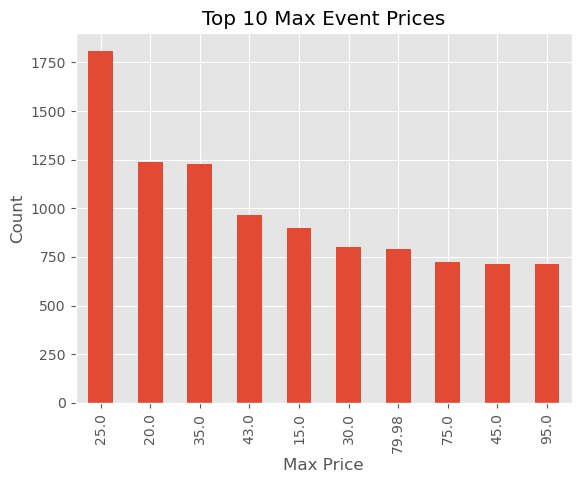

In [14]:
ax = df['Max_Price'].value_counts() \
    .head(10) \
    .plot(kind = 'bar', title = 'Top 10 Max Event Prices')
ax.set_xlabel('Max Price');
ax.set_ylabel('Count');


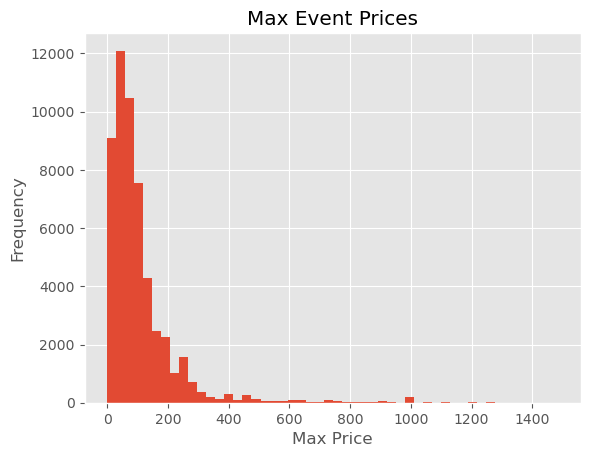

In [15]:
# plot distribution of max prices, removing outliers
no_outliers = df[df.Max_Price < 1500]
ax = no_outliers.Max_Price.plot(kind = 'hist', bins = 50, title = 'Max Event Prices');
ax.set_xlabel('Max Price');


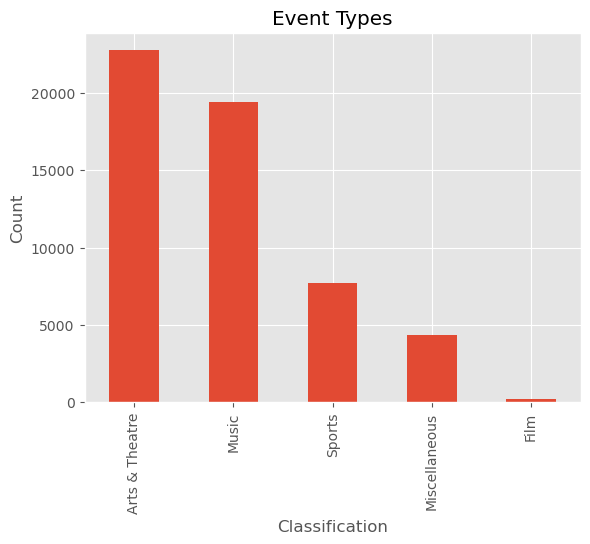

In [16]:
# plot distribution of event types
ax = df.Classification.value_counts().plot(kind = 'bar', title = 'Event Types');
ax.set_ylabel('Count');

In [17]:
# averages and medians of each classification
mean_med_prices = df[df.Classification != 'Miscellaneous'].groupby('Classification')['Max_Price'].agg(['mean', 'median']).round(2).sort_values(by = 'mean', ascending = False)
display(mean_med_prices)



,mean,median
Classification,,
Sports,366.68,70.00
Arts & Theatre,113.63,93.83
Music,94.74,59.50
Film,30.08,19.00


### Step 4: Feature Relationships

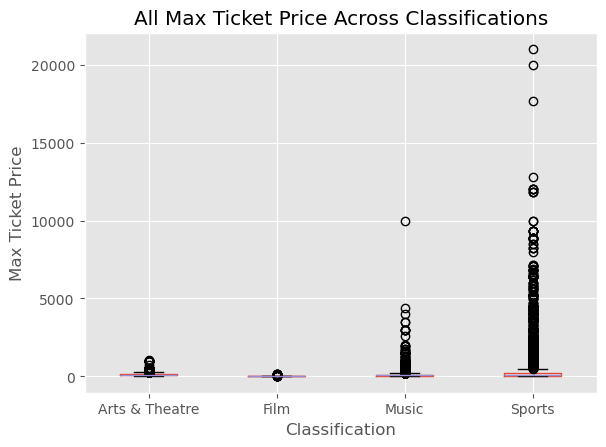

In [18]:
#upcoming events over time and their max prices with color coded by genre
ax = df[df.Classification != 'Miscellaneous'].boxplot(by = 'Classification');
plt.title('All Max Ticket Price Across Classifications')
ax.set_xlabel('Classification')
ax.set_ylabel('Max Ticket Price')
plt.suptitle('')
plt.show()



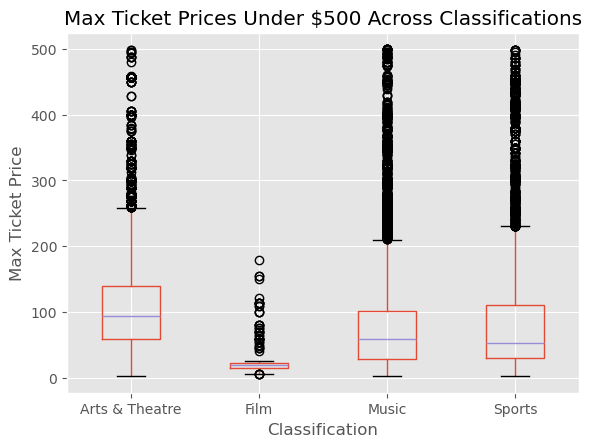

In [19]:
ax = df[(df.Max_Price < 500) & (df.Classification != 'Miscellaneous')].boxplot(by = 'Classification');
plt.title('Max Ticket Prices Under $500 Across Classifications')
ax.set_xlabel('Classification')
ax.set_ylabel('Max Ticket Price')
plt.suptitle('')
plt.show()

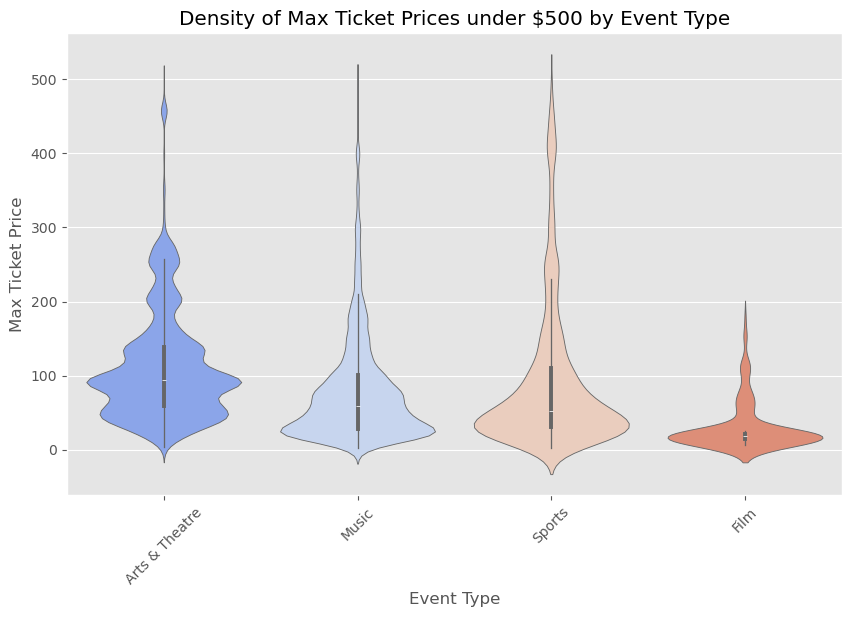

In [20]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Classification', y='Max_Price', data=df[(df.Classification != 'Miscellaneous') & (df.Max_Price < 500)], palette='coolwarm')
plt.title('Density of Max Ticket Prices under $500 by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Max Ticket Price')
plt.xticks(rotation=45)
plt.show()

In [21]:
# calculate upper limit of each category to understand outliers for each one and visualize them separately

# extract q1 and q3 quartiles for each category
q3 = []
q1 = []
classifications = ['Arts & Theatre', 'Film', 'Music', 'Sports']
for c in classifications:
    at_stats = df[df.Classification == f'{c}'].describe().reset_index()
    q3.append(at_stats[at_stats['index'] == '75%']['Max_Price'].iloc[0])
    q1.append(at_stats[at_stats['index'] == '25%']['Max_Price'].iloc[0])


# calculate upper limit for each class
upper_lim = []
for x in [0, 1, 2, 3]:
    u_lim = q3[x]+1.5*(q3[x] - q1[x])
    upper_lim.append(round(u_lim, 2))


outliers_count = []
percent_outliers = []
total_event_counts = []
for k,v in {0:'Arts & Theatre', 1:'Film', 2:'Music', 3:'Sports'}.items():
    outliers = df[(df['Max_Price'] > upper_lim[k]) & (df['Classification'] == v)]
    outliers_count.append(len(outliers))
    percent_outliers.append(str(round(len(outliers)/len(df[df.Classification == v])*100)) + "%")
    total_event_counts.append(round(len(df[df.Classification == v])))



# display as df
outliers_table = {'Classification': classifications, 'Total Number of Events': total_event_counts, 'Number of Outliers': outliers_count,
        '% of Total Events': percent_outliers, 'Upper Limit ($)': upper_lim}

# Create DataFrame
outliers_df = pd.DataFrame(outliers_table)


display(outliers_df.sort_values(by = 'Upper Limit ($)', ascending = False))


,Classification,Total Number of Events,Number of Outliers,% of Total Events,Upper Limit ($)
3,Sports,7720,1125,15%,505.00
0,Arts & Theatre,22759,1369,6%,258.30
2,Music,19437,1551,8%,208.25
1,Film,202,42,21%,31.50


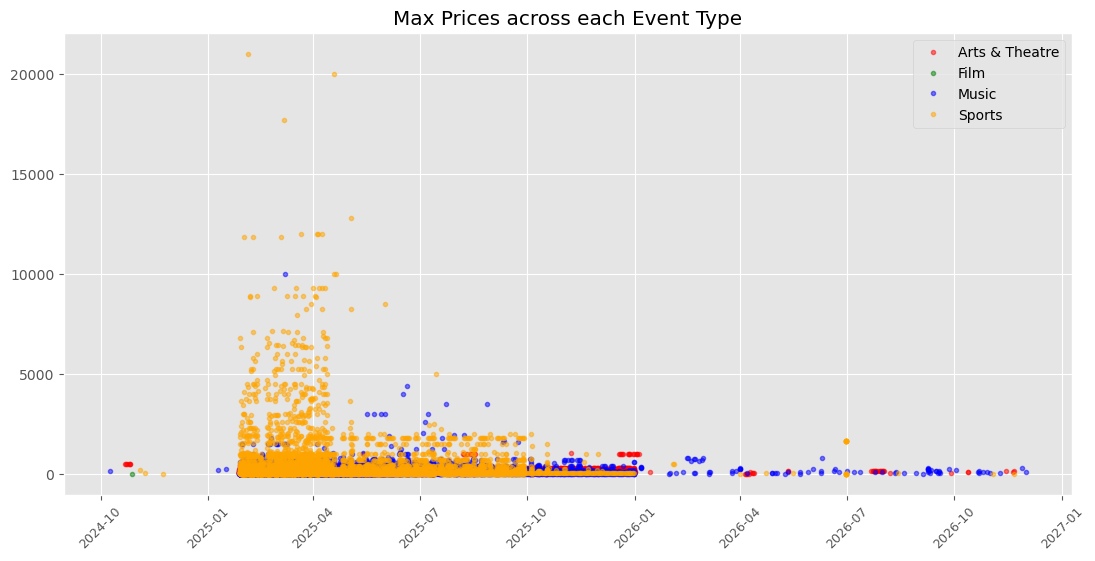

In [22]:
# plot scatter plot of max prices vs. their event dates and color code by category
df_no_misc = df[df.Classification != 'Miscellaneous']
grouped = df_no_misc.groupby('Classification')

# create color map for each group
color_map = {'Arts & Theatre': 'red', 'Film': 'green', 'Music': 'blue', 'Sports':'orange'}

# plot
fig, ax = plt.subplots(figsize = (13, 6))
ax.margins(0.05)
for name, group in grouped:
    ax.plot(group.Event_Start_Date, group.Max_Price, c = color_map[name], marker = 'o', linestyle = '', ms = 3, label = name, alpha = 0.5);
ax.legend();
plt.title('Max Prices across each Event Type')
# set x-axis locator to display ticks every month
#ax.xaxis.set_major_locator(mdates.MonthLocator())

# change x ticks size
plt.xticks(fontsize = 9, rotation = 45)
plt.show();



In [23]:
# calculate max of max prices and determine event
classifications = ['Sports', 'Music', 'Film', 'Arts & Theatre']
max_prices = []
max_events = []
for c in classifications:
    max_price = df[(df.Classification == c) & (df.Max_Price == max(df[df.Classification == c]['Max_Price']))]['Max_Price'].iloc[0]
    max_event_name = df[(df.Classification == c) & (df.Max_Price == max(df[df.Classification == c]['Max_Price']))]['Event_Name'].iloc[0]
    max_prices.append("$" + str(round(max_price)))
    max_events.append(max_event_name)


# display as df
max_table = {'Classification': classifications, 'Event Name': max_events,
        'Max Price': max_prices}

# Create DataFrame
max_df = pd.DataFrame(max_table)


display(max_df)



,Classification,Event Name,Max Price
0,Sports,LA Clippers vs. Los Angeles Lakers,$21000
1,Music,Free Beer (the Band) Florida's #1 Party Band (...,$10000
2,Film,STOP MAKING SENSE: A Film by Jonathan Demme an...,$179
3,Arts & Theatre,Kevin James: Owls Don't Walk,$1041


### Step 5: Data Reflections and Analysis

The four main event types in this dataset are Sports, Music, Film, and Theatre & Arts. Miscellaneous event types were not considered in this analysis. 

Looking at the mean and median of each Event Type, it is clear that all event types display a right skew, with Sports displaying the most extreme skew followed by Music, Arts & Theatre, & Film. This offers a good segwayto examine the density of max prices accross each event type and the information this convey in terms of perceived demand for each event type. 

| Classification |   Mean  | Median |
| -------------- | ------- | ------ |
| Sports         | $366.68 | $70.00 |
| Arts & Theatre | $113.63 | $93.83 |
| Music          | $94.74  | $59.50 |
| Film           | $30.08  | $19.00 |

Due to the extreme outliers and their impact on visualization of max price distribution, a violin plot was used to observe the density of Max Prices per event, filtering out any Max Prices over $500 based on the max upper limit for Sports. The plot showed that the highest density of Max Prices for Arts & Theatre hovered at around $100, while the highest density of all other events hovered at the lower end between $20 to $50. This shows that for Arts & Theatre, maximum prices closer to the average of $113 are more common indicating more sustained popularity and demand for the Arts & Theatre events. For the other events, the higher density on the lower price range shows that the majority of events within these categories may not bring much demand. Instead, there may be select events for each of the remaining classifications that drive high maximum ticket prices due to event-specific popularity and wide-interest.  

From the outlier data below, we can see that Sports displays the higher upper limit and a significant amount of 15% of all events have max ticket prices above this limit. Although Film shows a high number of outlier events, the Max Price upper limit is at a more humble price of $31.50, six times less than Sports. Arts & Theatre and Music also have a high upper limit, but still lie at nearly half of Sports' upper limit. This indicates that several sports events have a perceived high demand that results in extreme ticket prices going for sale. 

#### Outliers
| Classification |	Total Number of Events | Number of Outliers	| % Outliers from Total Events	| Upper Limit |
| -------------- | ------- | ------ | ------ | ------ |
| Sports |	7,720 |	1,125 |	15%	| $505.00 |
| Arts & Theatre |	22,759	| 1,369 |	6%	| $258.30 |
| Music	| 19,437 |	1,551 |	8%	| $208.25 |
| Film | 202 |	42 | 21%	| $31.50 |

Finally, taking a look at the specific events with the maximum max prices for each classification, we see some extreme prices for sports and music. For future analysis, it would be valuable to breakdown the certain characteristics of each "Event Name" and the max ticket prices distributed based on those characteristics (ex. music genre, sports team, film directors, etc.). For now, we can takeaway that Sports and Music events display a wide range of max prices that may correlate to the perceived demand of what extreme fans might be willing to pay for a seat in the venue. However, Arts & Theatre events show a more consistent and sustained demand with less extreme ticket prices. Additionally, film ticket prices remain on the lower end in comparison to the other three classifications. 

#### Maximums
| Classification |   Event Name  | Max Price |
| -------------- | ------- | ------ |
| Sports         | LA Clippers vs. Los Angeles Lakers | $21,000 |
| Music | Free Beer (the Band) Florida's #1 Party Band (A Tribute to The Rooster! Marcus Outzen former QB for FSU) | $10,000 |
| Arts & Theatre          | Kevin James: Owls Don't Walk  | $1,041 |
| Film           | STOP MAKING SENSE: A Film by Jonathan Demme and Talking Heads  | $179 |